<a href="https://colab.research.google.com/github/lpitts235286/CS-4410/blob/main/HW5_KMeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

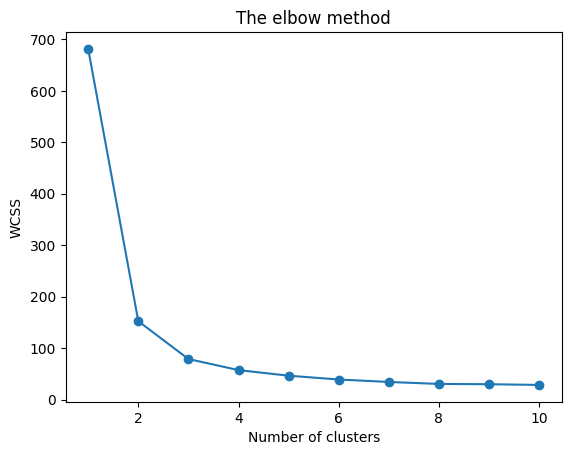

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data

# Calculate WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [2]:
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression without PCA
start = time.time()
logistic = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic.fit(X_train_scaled, y_train)
score_no_pca = logistic.score(X_test_scaled, y_test)
time_no_pca = time.time() - start

### Logistic Regression with PCA (95% variance)
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

start = time.time()
logistic_pca = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_pca.fit(X_train_pca, y_train)
score_pca = logistic_pca.score(X_test_pca, y_test)
time_pca = time.time() - start

# Results
print("Without PCA: Accuracy = {:.4f}, Time = {:.2f} sec".format(score_no_pca, time_no_pca))
print("With PCA: Accuracy = {:.4f}, Time = {:.2f} sec".format(score_pca, time_pca))
print("Reduced dimensions from {} to {}".format(X_train.shape[1], X_train_pca.shape[1]))

Without PCA: Accuracy = 0.9157, Time = 55.47 sec
With PCA: Accuracy = 0.9220, Time = 50.25 sec
Reduced dimensions from 784 to 330
